(motion_in_2d)=
# Motion in 2D

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

## Newton's laws in two dimensions

Both force and position are vectors, so Newton's second law becomes:

\\[F=m\frac{d^2\vec{r}}{dt^2}\\]

where \\(\vec{r}\\) is the position vector \\(r=x(t)\vec{i}+y(t)\vec{j}\\), with unit vectors \\(\vec{i}\\) and \\(\vec{j}\\) in \\(x\\) and \\(y\\) directions respectively.

Thus, this equation represents two individual equations, one for each Cartesian direction:

\\[F_x=m\frac{d^2x}{dt^2}\\]

\\[F_y=m\frac{d^2x}{dt^2}\\]

## Tutorial Problem 2.1

A cricket ball is hit at an angle \\(\alpha=53.1˚\\) to the horizontal, at a speed of \\(37m/s\\). Find:

1. The maximum height that the ball will reach
2. The total time that the ball travels before it hits the ground
3. How far the ball will travel horizontally before it hits the ground

In [2]:
def total_time(a, v0, g=9.81): # obtain total time of flight
    a = a * 2 * np.pi / 360 # convert degrees to radians
    
    # vertical component: -v0sin(a) = v0sin(a) - gt
    # rearrange for t
    return 2 * v0 * np.sin(a) / g

def get_xy(a, v0, start, end, interval):
    a = a * 2 * np.pi / 360
    t = np.arange(start, end, interval)
    
    # horizontal component: x(t) = vcos(angle)*t
    x = v0 * np.cos(a) * t
    
    # vertical component: y(t) = vsin(angle)*t - 1/2 gt**2
    y = v0 * np.sin(a) * t - 0.5 * 9.81 * t**2  
    return x, y

In [3]:
end_1 = total_time(53.1, 37)

print("Total time the ball travels before hitting the ground = %.2fs" % (end_1))

X1, Y1 = get_xy(53.1, 37, 0, end_1, 0.01)

print("Maximum height that the ball will reach is %.2fm" % (max(Y1)))

print("The ball travels horizontally %.2fm before hitting the ground" % (X1[-1]))

Total time the ball travels before hitting the ground = 6.03s
Maximum height that the ball will reach is 44.62m
The ball travels horizontally 133.96m before hitting the ground


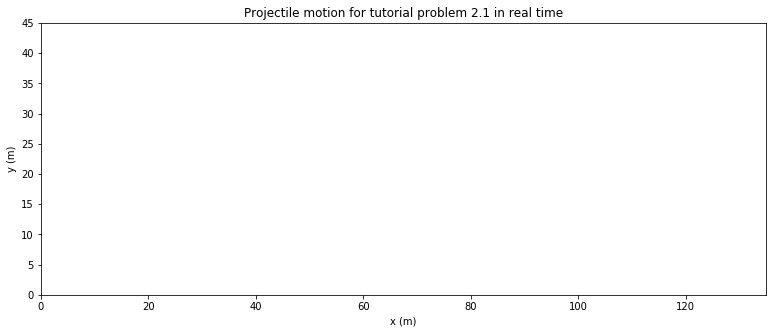

In [4]:
# making the animation
nframes = len(X1)

# plot background axes
fig, ax = plt.subplots(figsize=(13,5))

# customise axes
ax.set_xlim((0, 135))
ax.set_ylim((0, 45))
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_title('Projectile motion for tutorial problem 2.1 in real time')

# plot line
line, = ax.plot([], [], 'ro', lw=2)

# plot background for each frame
def init():
    line.set_data([], [])
    return (line,)

# plot data for each frame
def animate(i):
    x = X1[i]
    y = Y1[i]
    line.set_data(x, y)
    return (line,)

# call the animator
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nframes, interval=10, 
                               blit=True)

In [5]:
HTML(anim.to_html5_video())

## Tutorial Problem 2.2

A rock is ejected from a volcano at an angle \\(\alpha=89˚\\) with the horizontal with initial speed \\(200m/s\\). Find:

1. The maximum height that the ball will reach
2. The total time that the ball travels before it hits the ground
3. How far the ball will travel horizontally before it hits the ground

In [6]:
# reuse functions above

end_2 = total_time(89, 200)

print("Total time the rock travels before hitting the ground = %.2fs" % (end_2))

X2, Y2 = get_xy(89, 200, 0, end_2, 0.1)

print("Maximum height that the rock will reach is %.fm" % (max(Y2)))

print("The rock travels horizontally %.fm before hitting the ground" % (X2[-1]))

Total time the rock travels before hitting the ground = 40.77s
Maximum height that the rock will reach is 2038m
The rock travels horizontally 142m before hitting the ground


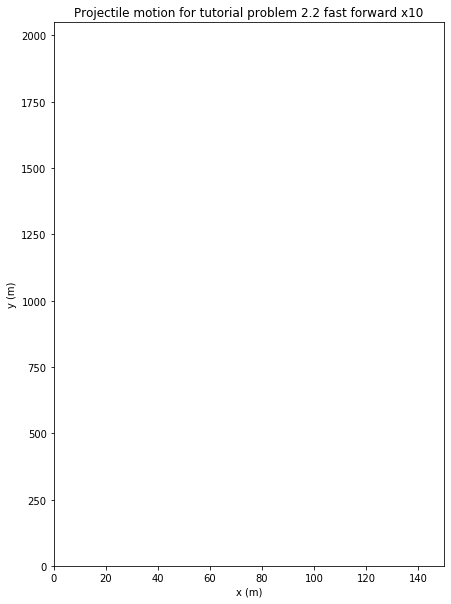

In [7]:
# animation again
nframes = len(X2)

# plot background axes
fig, ax = plt.subplots(figsize=(7,10))

# customise axes
ax.set_xlim((0, 150))
ax.set_ylim((0, 2050))
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_title('Projectile motion for tutorial problem 2.2 fast forward x10')

# plot line
line, = ax.plot([], [], 'bo', lw=2)

# plot background for each frame
def init():
    line.set_data([], [])
    return (line,)

# plot data for each frame
def animate(i):
    x = X2[i]
    y = Y2[i]
    line.set_data(x, y)
    return (line,)

# call the animator
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nframes, interval=10, 
                               blit=True)

In [8]:
HTML(anim.to_html5_video())

## Tutorial Problem 2.4

Consider a rock block of mass \\(m\\) sitting on a flat floor of a quarry, with a friction coefficient of \\(\mu\\) between the rock and the floor. 

A quarryman wraps a rope around the rock, and pulls with a force of magnitude \\(F\\). His goal is to slide the block along the floor at some constant speed. He does not necessarily have to pull horizontally; he can pull at any angle \\(\alpha\\) to the horizontal. 

Find an expression for \\(F\\) as a function of \\(\alpha\\), \\(\mu\\), \\(g\\), and \\(m\\). 

What would be the optimum choice of \\(\alpha\\), so that the block can be pulled with the smallest value of \\(F\\)?

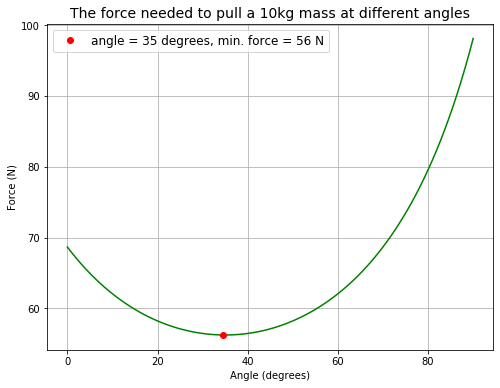

In [9]:
# plug in random numbers
u = 0.7
m = 10 #kg
g = 9.81 #m/s2

alpha = np.linspace(0, 0.5*np.pi, 100) # range of angles between 0 and 90 degrees in radians

# horizontal: Fcos(a) = uN
# vertical: Fsin(a) + N = mg
# N = mg - Fsin(a)
# sub to horizontal
# Fcos(a) = u(mg-Fsin(a))
# rearrange for F

F = (u*m*g)/(np.cos(alpha)+u*np.sin(alpha))
    
alpha = alpha*360/(2*np.pi) # convert angles from radians to degrees

minimum = np.where(F == min(F))[0][0] # find index of minimum F

# plot force needed to pull the mass at different angles

fig = plt.figure(figsize=(8,6))    
plt.plot(alpha, F, 'g')
plt.plot(alpha[minimum], F[minimum], 'ro', label='angle = %.f degrees, min. force = %.f N' % (alpha[minimum], F[minimum]))
plt.xlabel('Angle (degrees)')
plt.ylabel('Force (N)')
plt.title('The force needed to pull a %.fkg mass at different angles' % (m), fontsize=14)
plt.grid(True)
plt.legend(loc='upper left', fontsize=12)

plt.show()

## Circular Motion

### Position, velocity and acceleration in Cartesian coordinates

For a body moving in a circle counterclockwise, its motion is represented by:

\\[x(t)=Rcos(\omega t)\\]

\\[y(t)=Rsin(\omega t)\\]

where \\(\omega\\) is the angular frequency, and \\(R\\) is the radius of the circle.

In vector form, this becomes:

\\[r(t)=Rcos(\omega t)\vec{i}+Rsin(\omega t)\vec{j}\\]

Velocity vector is obtained by differentiating the position vector:

\\[v(t)=-\omega Rsin(\omega t)\vec{i}+\omega Rcos(\omega t)\vec{j}\\]

with magnitude \\(|v|=\omega R\\).

Acceleration vector is found by differentiating the velocity vector:

\\[a(t)=(-\omega^2Rcos(\omega t))\vec{i}+(-\omega^2Rsin(\omega t))\vec{j}\\]

with magnitude \\(|a|=\omega^2R\\). It is called centripetal acceleration, and acts in the direction towards to the centre of the circle.

![](images/circular-motion.png)

### Position, velocity and acceleration in polar coordinates

In polar coordinates, position is described by:

\\[r(t)=r(t)\vec{e_R}\\]

where \\(r\\) is the distance from the origin (centre of rotation) to the body, and \\(\vec{e_R}\\) is a unit vector pointing radially away from the origin.

Velocity in polar coordinates becomes:

\\[v(t)=r'\vec{e_R}+r\omega\vec{e_{\theta}}\\]

where \\(\vec{e_{\theta}}\\) is the unit vector rotated anticlockwise from \\(\vec{e_R}\\) by \\(90˚\\).

Differentiating velocity, the centripetal acceleration in polar coordinates is found to be:

\\[a(t)=(r"-\omega^2r)\vec{e_R}+(2\omega r'+\omega'r)\vec{e_\theta}\\]

## Tutorial Problem 2.6

Imagine a bicycle wheel rotating at constant angular velocity \\(\omega\\), with an ant crawling outward along one of the spokes, at a constant speed \\(v\\) (relative to the spoke). Express the ant’s velocity and acceleration in terms of polar coordinates. Discuss each of the terms.

Period = 2 s


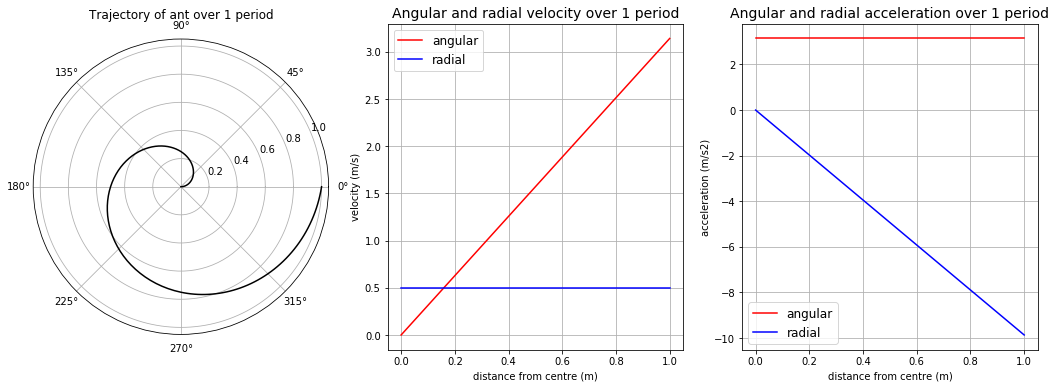

In [10]:
angles = np.linspace(0, 2*np.pi, 201) # make an array of angles between 0 and 360 degrees in radians

drdt = np.ones(len(angles)) 
drdt = 0.5 * drdt # speed at which the ant is crawling outward, plug in arbitrary number 0.5 m/s

t = np.linspace(0, 2, len(angles)) # make a list of time between 0 and 2 seconds

r = drdt * t # distance from centre of wheel over time

w = np.pi # angular velocity plug in arbitrary number pi

print("Period = %.f s" % (2*np.pi/w)) # show period = 2 seconds

# angular velocity
v_r = drdt # radial component
v_a = r * w # angle component

# acceleration
a_r = -w**2 * r # radial component
a_a = 2 * w * drdt # angle component

# plot figures showing trajectory of ant, angular velocity, and acceleration

fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(131, projection='polar')
ax1.plot(angles, r, 'k')
ax1.set_title('Trajectory of ant over 1 period')

angles = angles * 360 / (2 * np.pi)

ax2 = fig.add_subplot(132)
ax2.plot(r, v_a, 'r', label='angular')
ax2.plot(r, v_r, 'b', label='radial')
ax2.set_xlabel('distance from centre (m)')
ax2.set_ylabel('velocity (m/s)')
ax2.set_title('Angular and radial velocity over 1 period', fontsize=14)
ax2.legend(loc='best', fontsize=12)
ax2.grid(True)

ax3 = fig.add_subplot(133)
ax3.plot(r, a_a, 'r', label='angular')
ax3.plot(r, a_r, 'b', label='radial')
ax3.set_xlabel('distance from centre (m)')
ax3.set_ylabel('acceleration (m/s2)')
ax3.set_title('Angular and radial acceleration over 1 period', fontsize=14)
ax3.legend(loc='best', fontsize=12)
ax3.grid(True)

plt.show()

## Tutorial Problem 2.7

Consider a small body of mass m, suspended at the end of a “rigid” rod of length \\(l\\), which is suspended from the ceiling in a manner that allows it to freely swing from left to right.

The pendulum starts its motion from rest, at an angle \\(\theta_o\\). It is shown that the motion was given by \\(\theta(t) = \theta_ocos(\omega_{n}t)\\), where \\(\omega_n=\sqrt{\frac{g}{l}}\\) is the natural angular frequency of the mass.

What can you say about the implications of the other governing equation, obtained from Newton’s law in the “r-direction”: \\(−T+mg=−m\omega^2l\\)? Since we have already found \\(\theta(t)\\), is this other equation irrelevant? If it is not irrelevant, what exactly does it tell us? Carry out your analysis as far as possible. Assuming that the rod will break if the tension it carries becomes too large, at what angle \\(\theta\\) might this occur?

In [11]:
g = 9.81 # m/s2

# plug in arbitrary numbers
l = 1 # m
m = 1 # kg

wn = np.sqrt(g/l) 

t = np.linspace(0, 2*np.pi/wn, 100)

# sub into function describing motion
angle = np.pi/12 * np.cos(wn*t)

# convert to x and y coordinates
X = np.sin(angle) 
Y = 1 - np.cos(angle)

# angular velocity over time
w = -wn * np.sin(wn*t)

# tension over time
T = m * g + m * w**2 * l

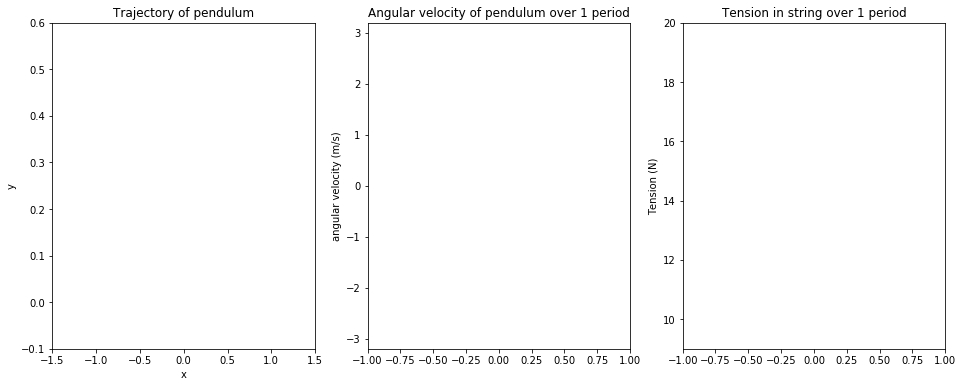

In [12]:
nframes = len(t)


# Plot background axes
fig, axes = plt.subplots(1,3, figsize=(16,6))

# define lines
line1, = axes[0].plot([], [], 'ro', lw=2)
line2, = axes[0].plot([], [], 'k')
line3, = axes[1].plot([], [], 'go', lw=2)
line4, = axes[2].plot([], [], 'bo', lw=2)

# customise axes 

axes[0].set_xlim((-1.5, 1.5))
axes[0].set_ylim((-0.1, 0.6))
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Trajectory of pendulum')


axes[1].set_xlim((-1, 1))
axes[1].set_ylim((-3.2, 3.2))
axes[1].set_ylabel('angular velocity (m/s)')
axes[1].set_title('Angular velocity of pendulum over 1 period')


axes[2].set_xlim((-1, 1))
axes[2].set_ylim((9, 20))
axes[2].set_ylabel('Tension (N)')
axes[2].set_title('Tension in string over 1 period')

    
lines = [line1, line2, line3, line4]

# Plot background for each frame
def init():
    for line in lines:
        line.set_data([], [])
    return lines

# Set what data to plot in each frame
def animate(i):
    
    x1 = X[i]
    y1 = Y[i]
    lines[0].set_data(x1, y1)
    x_1 = X
    y_1 = Y
    lines[1].set_data(x_1, y_1)
    
    x2 = 0
    y2 = w[i]
    lines[2].set_data(x2, y2)
    
    x3 = 0
    y3 = T[i]
    lines[3].set_data(x3, y3)

    
    return lines

# Call the animator
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nframes, interval=25, blit=True)

In [13]:
HTML(anim.to_html5_video())

### References

Course notes from Lecture 2 of the module ESE 95011 Mechanics